# FORMULAS

You can perform an ANOVA test in R using the `aov` built-in function. As we mentioned in the lecture, this function uses **formulas** as their inputs. Let's briefly describe their meaning and uses.

A formula object is just a variable, but a special type  that specifies a **relationship** between other variables. A formula is specified using the "tilde operator". ~. A very simple example of a formula is shown below:

In [1]:
formula1 <- out ~ pred
formula1

out ~ pred

Normally, the variable on the left-hand side of a tilde, ~ is called the "dependent variable", while the variables on the right-hand side are called the "independent variables" and are joined by plus signs +. That is why, you could also consider other examples involving

In [2]:
formula2 <- out ~ pred1 + pred2 # more than one variable on the right
formula2

out ~ pred1 + pred2

**N.B.** The names for these variables change depending on the context. You might have already seen independent variables appear as "predictor (variable)", "controlled variable", "feature", etc. Similarly, you might come across dependent variables as "response variable", "outcome variable" or "label".

Some times, we will need or want to create a formula from an R object, such as a string. In such cases, you can use the formula or as.formula() function

In [3]:
?as.formula

In [4]:
formula5<- "out ~ pred"
formula5
class(formula5)

formula5<-as.formula("out ~ pred")
formula5
class(formula5)

[1] "out ~ pred"

[1] "character"

out ~ pred

[1] "formula"

## Operators

We have just seen that the independent variables can be joined with the + symbol. However, this is not the only symbol that we can use in your formulas. Let's have a look at other kind of symbols:


"~" : As we saw above, this operator separates the dependent variable from the independent variables. For example, y ~ x means "y is predicted by x".

"+" : As we saw above, this operator adds independent variables to the model. For example, y ~ x + z means "y is predicted by x and z".

"-" : This operator removes independent variables from the model. For example, y ~ x - z means "y is predicted by x, but not z".

"*" : This operator includes all possible interactions between the predictor variables. For example, y ~ x * z means "y is predicted by the main effects of x and z, as well as their interaction".

## Functions

You can also use functions within formulas to transform variables or perform other operations. For example, y ~ log(x) means "y is predicted by the logarithm of x".

In [5]:
formula3 <- out ~ pred1 * pred2 # different relationship between predictors
formula3

formula4 <- ~ var1 + var2 # a ’one-sided’ formula
formula4

out ~ pred1 * pred2

~var1 + var2

# Statistical test for two variables (continuous vs categorical)

Let's generate some data for the rest of the tutorial

In [6]:
set.seed(1234)

# Generate random data for group 1 with mean 10 and standard deviation 2
welch.data.1<-rbind(data.frame(value=rnorm(25, mean = 10, sd = 2), group='a'),
                  data.frame(value=rnorm(25, mean = 13, sd = 3), group='b'))

welch.data.2<-rbind(data.frame(value=rnorm(25, mean = 10, sd = 2), group='a'),
                  data.frame(value=rnorm(25, mean = 11, sd = 3), group='b'))

# Generate random data for group 1 with mean 10 and standard deviation 2
students.data<-rbind(data.frame(value=rnorm(25, mean = 10, sd = 2), group='a'),
                  data.frame(value=rnorm(25, mean = 11, sd = 2), group='b'))

# Generate random data for group 1 with mean 10 and standard deviation 2
anova.data<-rbind(data.frame(value=rnorm(25, mean = 10, sd = 2), group='a'),
                  data.frame(value=rnorm(25, mean = 12, sd = 2), group='b'), 
                  data.frame(value=rnorm(25, mean = 10, sd = 2), group='c'))

<div class="alert alert-info">  <b>Practice</b>: Visualize the above data frames using boxplots.

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.4.0      ✔ purrr   1.0.1 
✔ tibble  3.1.8      ✔ dplyr   1.0.10
✔ tidyr   1.2.1      ✔ stringr 1.5.0 
✔ readr   2.1.3      ✔ forcats 0.5.2 
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


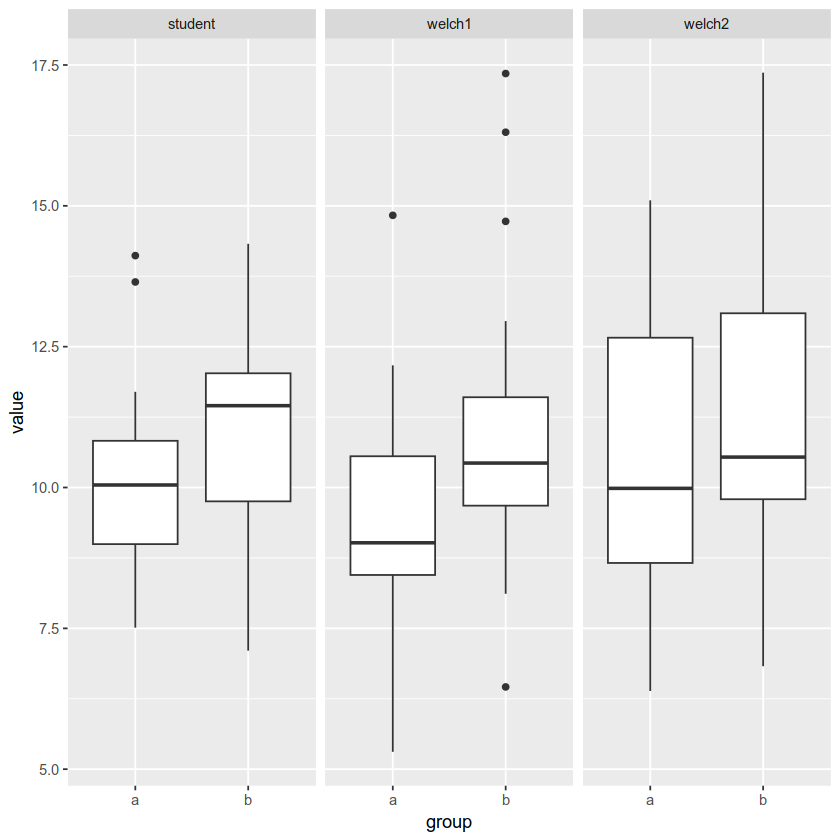

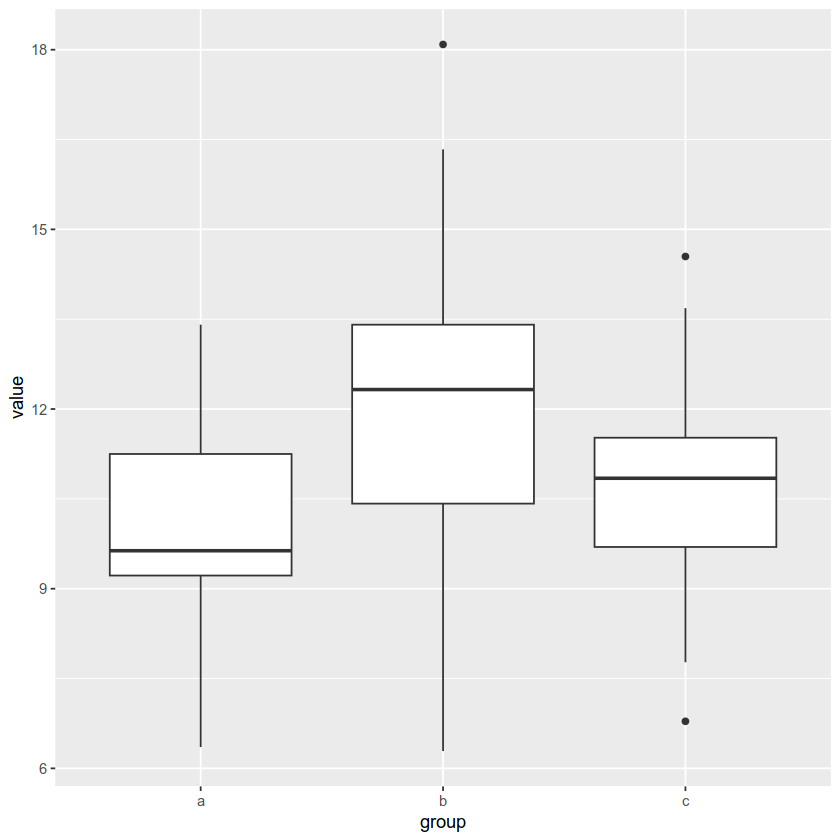

In [7]:
library(tidyverse)
welch.data.1$type="welch1"
welch.data.2$type="welch2"
students.data$type="student"
two.groups.dat<-rbind(welch.data.1, welch.data.2, students.data)
ggplot(data=two.groups.dat, aes(x=group, y=value)) + geom_boxplot() + facet_wrap(~type)

ggplot(data=anova.data, aes(x=group, y=value)) + geom_boxplot() 

## WELCH'S T-TEST

To perform a Welch's t-test, you can use the R function `t.test`. If we look at its documenation, this is what we see:

    ## Default S3 method:
    t.test(x, y = NULL,
           alternative = c("two.sided", "less", "greater"),
           mu = 0, paired = FALSE, var.equal = FALSE,
           conf.level = 0.95, ...)```

This function is used in the same as we saw for performing a one-sample t-test. The only thing that changes is that now you have two populations, which you have to pass to the x and y arguments in `t.test`. In addition, if you  perform a Welch's t-test, you are asumming that the variances between both populations are differences. To specify this in `t.test` you have to set ```var.equal = FALSE```, otherwise you would be performing a Student's t-test:

In [8]:
t.test(x=welch.data.1[welch.data.1$group=="a", "value"],
       y=welch.data.1[welch.data.1$group=="b", "value"], 
       var.equal = FALSE)


	Welch Two Sample t-test

data:  welch.data.1[welch.data.1$group == "a", "value"] and welch.data.1[welch.data.1$group == "b", "value"]
t = -2.445, df = 44.835, p-value = 0.01848
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -2.7186234 -0.2625635
sample estimates:
mean of x mean of y 
 9.516435 11.007029 


As a result of this test, assuming a type I error $\alpha=0.05$, we should reject the null that assumes that the means of both populations are equal. 

## STUDENT'S T-TEST

Running a Student's t-test is similar to Welch's, but setting var.equal = TRUE:

In [9]:
t.test(x=students.data[students.data$group=="a", "value"],
       y=students.data[students.data$group=="b", "value"], 
       var.equal = TRUE)


	Two Sample t-test

data:  students.data[students.data$group == "a", "value"] and students.data[students.data$group == "b", "value"]
t = -1.7401, df = 48, p-value = 0.08826
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -1.8455038  0.1331359
sample estimates:
mean of x mean of y 
 10.11186  10.96805 


## T-test using formulas

As you can use, running these tests from a data frame like the ones we have above can make our code a bit lengthy and difficult to read. Fortunately, for these cases, we can use the formula syntax we introduced at the beginning of this tutorial. If we look at the documentation of `t.test`, this is what it says about using formulas:

    ## S3 method for class 'formula'
    t.test(formula, data, subset, na.action, ...)

Using formulas, running the previous examples is very easy:

In [10]:
# Run Welch's t-test
t.test(value ~ group, data = welch.data.1, var.equal = FALSE)

# Run Student's t-test
t.test(value ~ group, data = students.data, var.equal = TRUE)


	Welch Two Sample t-test

data:  value by group
t = -2.445, df = 44.835, p-value = 0.01848
alternative hypothesis: true difference in means between group a and group b is not equal to 0
95 percent confidence interval:
 -2.7186234 -0.2625635
sample estimates:
mean in group a mean in group b 
       9.516435       11.007029 



	Two Sample t-test

data:  value by group
t = -1.7401, df = 48, p-value = 0.08826
alternative hypothesis: true difference in means between group a and group b is not equal to 0
95 percent confidence interval:
 -1.8455038  0.1331359
sample estimates:
mean in group a mean in group b 
       10.11186        10.96805 


## ANOVA TEST

To run an anova test, we will the `aov` built-in function. This function has the following form:

    aov(formula, data = NULL, projections = FALSE, qr = TRUE,
        contrasts = NULL, ...)
        
Here we can only use formulas, but the syntax is similar to what we have seen already for the function `t-test`.

In [11]:
res.aov<-aov(value~group, data = anova.data)
res.aov

Call:
   aov(formula = value ~ group, data = anova.data)

Terms:
                   group Residuals
Sum of Squares   44.6691  348.7716
Deg. of Freedom        2        72

Residual standard error: 2.20092
Estimated effects may be unbalanced

mmm... And the p-value? Just running the above formula will not give you the p-value directly. For that, you will need to pass the resulting object from calling `aov` to the `summary` function:

In [12]:
summary(res.aov)

            Df Sum Sq Mean Sq F value Pr(>F)  
group        2   44.7  22.335   4.611 0.0131 *
Residuals   72  348.8   4.844                 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

So we finally got our p-value, which, assuming a type I error $\alpha=0.05$, suggests that we should reject the null that assumes that the means of all populations are equal. 

### POST-HOC ANALYSIS

The above result indicates that there is a significant difference in means between at least one pair of populations, but it does not specify which pairs have a significant difference. To identify significant pairs, we need to conduct a **post-hoc analysis**, which involves performing a Student's t-test for all possible population pairs in our data. 

However, since multiple tests will be performed in this analysis, we must adjust our type I error $\alpha$ to account for it. Correcting for multiple testing is crucial and will be discussed in detail towards the end of the course. There are multiple procedures for doing this kind of correction, but for now we will just assume a **Bonferroni** correction, which just divides the original type I error $\alpha$ by the number of tests performed. As a result, in the above result, since we had three groups, we will be performing three tests. Assuming a typical type I error $\alpha=0.05$, that means that the Bonferroni corrected type I error will be $\alpha=0.05/3$. That is, now, to claim that of the possible three tests are significant, their p-value must equal or smaller than 0.05/3, instead of the usual 0.05.

In R, we can run a post-hoc analysis performing pairwise comparisons using t-tests with the function `pairwise.t.test`:

In [13]:
pairwise.t.test(anova.data$value, 
                anova.data$group,
                p.adjust.method = "bonferroni")


	Pairwise comparisons using t tests with pooled SD 

data:  anova.data$value and anova.data$group 

  a     b    
b 0.012 -    
c 1.000 0.137

P value adjustment method: bonferroni 

From these results, we can claim that only the means between the group a and b are statistically different.